In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import sqlite3
#from scipy.stats import ttest_ind
#import scipy.stasts as stats

warnings.filterwarnings('ignore')

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')
# fetching vendor summary data 
df = pd.read_sql_query('select * from vendor_sales_summary',conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalEXciseTax,FreightCost,grossProfit,profitMargin,stockTurnOver,salesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


EDA:
1. previously, we examined the various tables in database to identify variables(columns) and their relationship and determined which are to be included in final analysis.
2. In this phase of EDA,we will analyze table to gain insight into distribution of each column.This will help to understand patterns,ensure data quality and then proceed with further analysis.

In [3]:
#summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [4]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalEXciseTax,FreightCost,grossProfit,profitMargin,stockTurnOver,salesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesQuantity',
       'TotalSalesDollars', 'TotalSalesPrice', 'TotalEXciseTax', 'FreightCost',
       'grossProfit', 'profitMargin', 'stockTurnOver', 'salesToPurchaseRatio'],
      dtype='object')

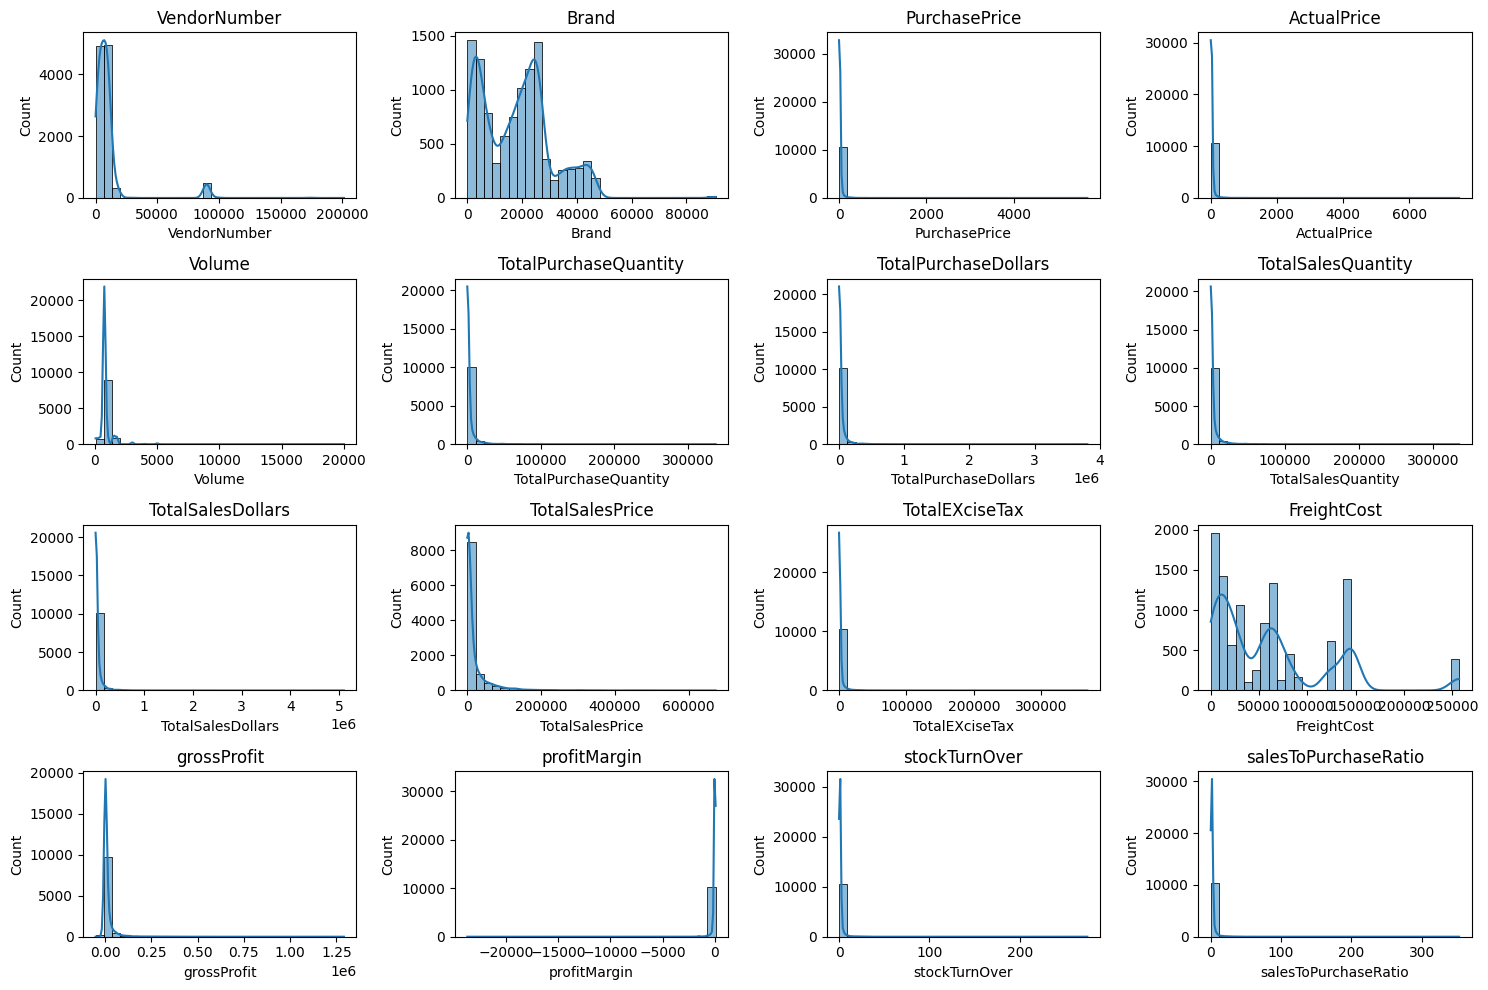

In [6]:
import seaborn as sns
# Distribution plots for numerical columns 
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #adjust grid layout for figure 
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
    

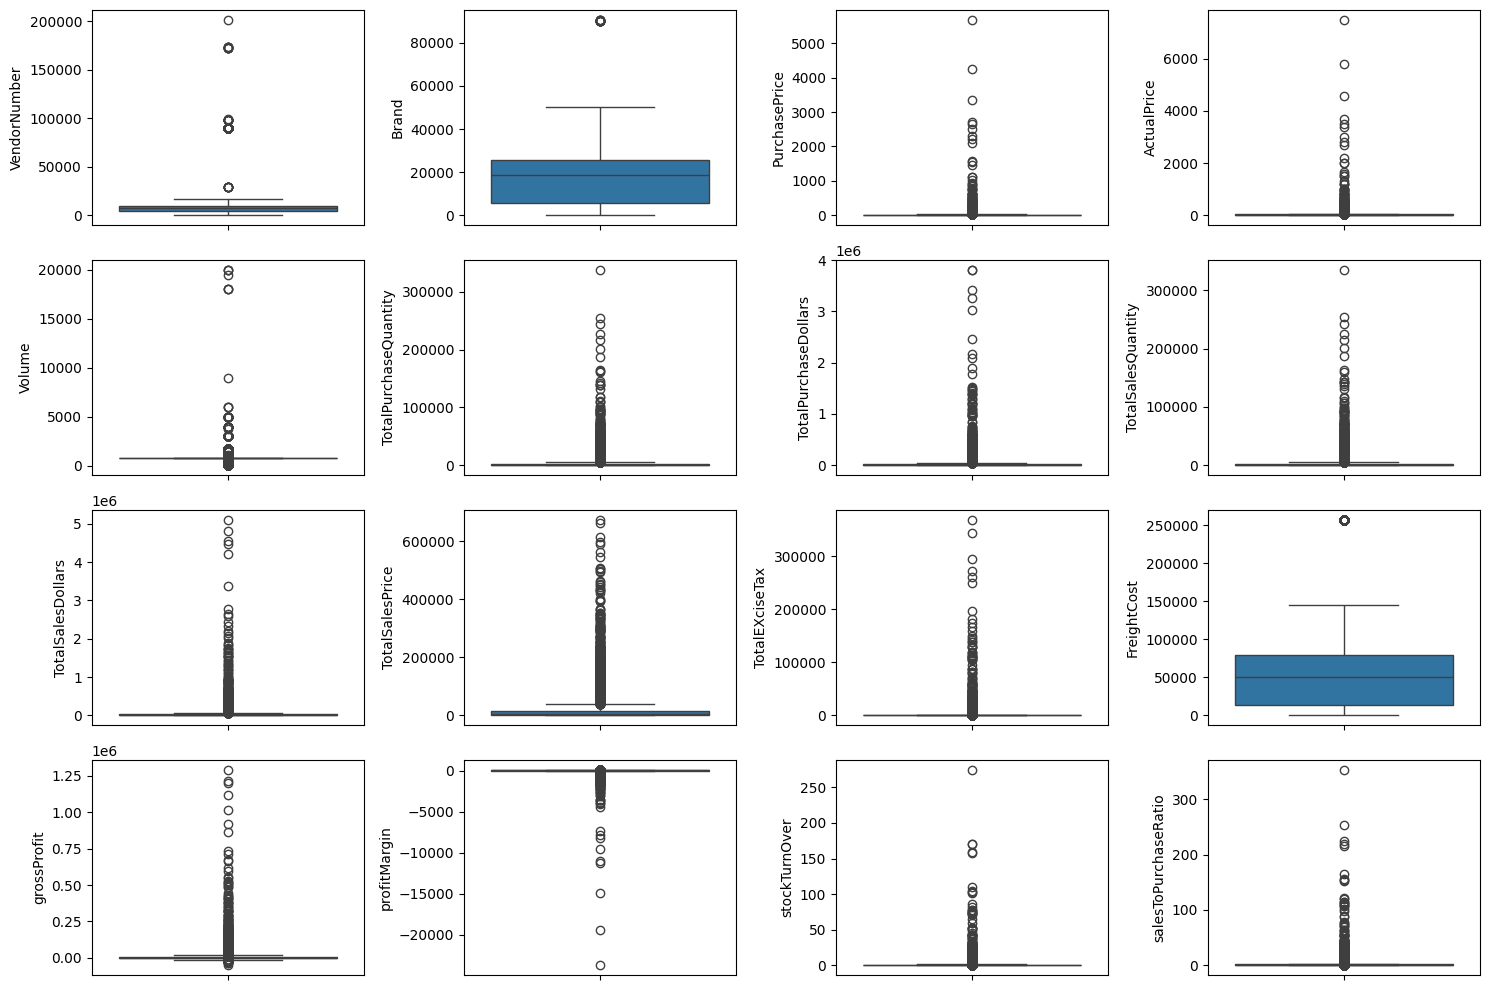

In [7]:
#Outlier detection with boxplots 
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

        Summary Statistics Insights : 
Negative & Zero Values : 
1.Gross Profit: min value is negative , indicating losses.Some products or transactions may be selling at loss due to high coast or selling at discounts below the purchase price 
2.Porfit margin : min value is -inf suggests revenue is zero.
3.Total Sales Quantity and Total Sales Dollars values are zero , meaning products are never sold.

Outliers  : 
1. purchase and actual prices : The max value are higher than the mean value indicating premium products.
2. Freight Cost: huge variations suggests logistics inefficiencies or bulk shipments
3. Stock Turnover : range from 0 to >100 ,implying some products are sold fast while others remain at inventory.

In [8]:
# we should not remove all outlier , as some would suggest premium products here. so the outlier which we should remove should be from gross profit =0 , profit margin = 0,totalsalesquantity=0
df=pd.read_sql_query(""" select * 
    from vendor_sales_summary 
    where grossProfit > 0 and profitMargin > 0 and TotalSalesQuantity > 0 """,conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalEXciseTax,FreightCost,grossProfit,profitMargin,stockTurnOver,salesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


Now we are going to find top 10 products and vendorNames which are present max time .

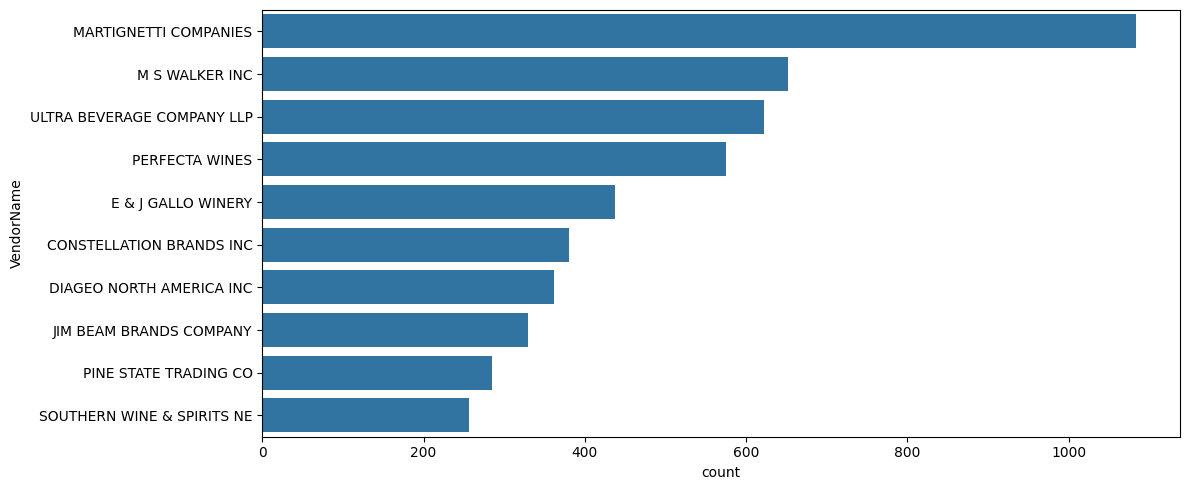

In [9]:

#count plots for categorical col 
cat_cols = ['VendorName','Description']
plt.figure(figsize=(12,5))
sns.countplot(y=df['VendorName'] , order=df['VendorName'].value_counts().index[:10]  )
plt.tight_layout()
plt.show()

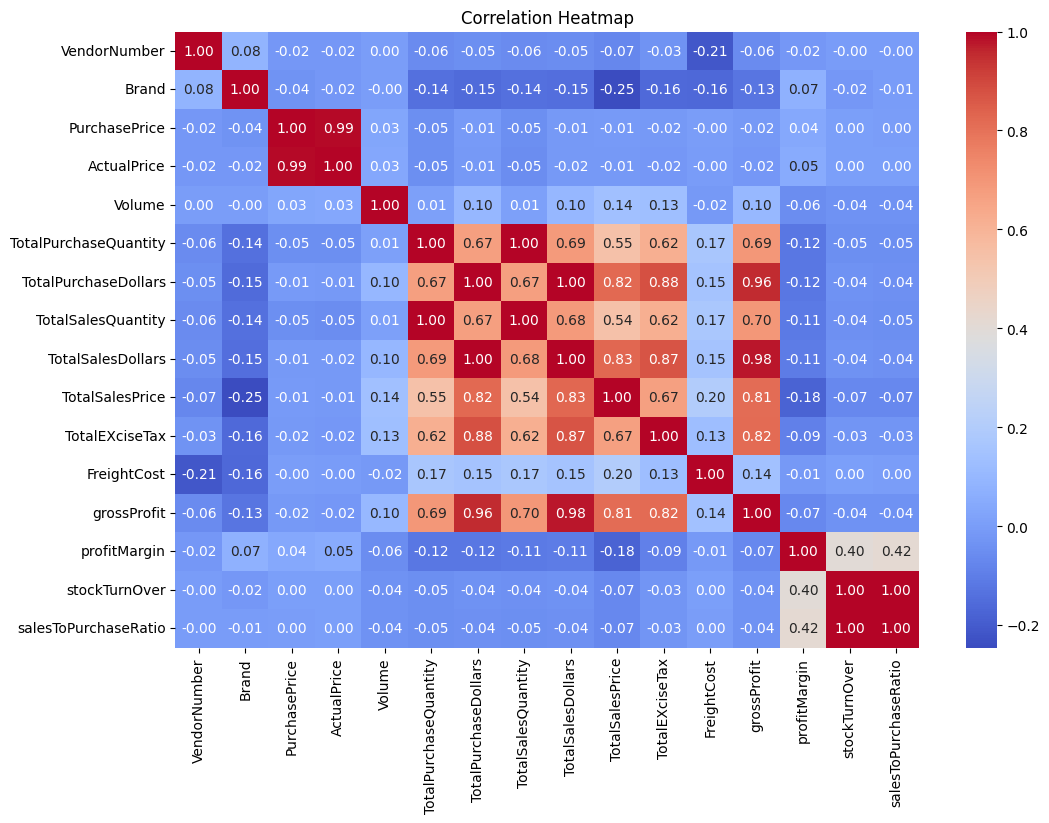

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f" , cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

Data Analysis : 

1.Identify Brands that needs promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins : 

In [37]:
 brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'profitMargin' : 'mean' }).reset_index()

In [40]:
#setting threshold value for profitMargin and TotalsaslesDollars.
low_sales_threshold = df['TotalSalesDollars'].quantile(0.15)
high_profit_threshold = df['profitMargin'].quantile(0.80)

In [41]:
low_sales_threshold


np.float64(563.53)

In [42]:
high_profit_threshold

np.float64(51.26484400161136)

In [44]:
target_brands = brand_performance[ 
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['profitMargin'] >= high_profit_threshold) 
    ]
print("Brands with low sales but with high profit margin ")
display(target_brands.sort_values('TotalSalesDollars') )

Brands with low sales but with high profit margin 


,Description,TotalSalesDollars,profitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
7433,Vino.e Falanghina Beneventno,558.57,63.352847
3326,Goulee Cos d'Estournel 10,558.87,69.434752
379,Atlas Peak Cab Svgn,559.84,60.803087
425,BV Coastal Estate Svgn Bl,560.35,52.779513


In [51]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1800]  #better visualization

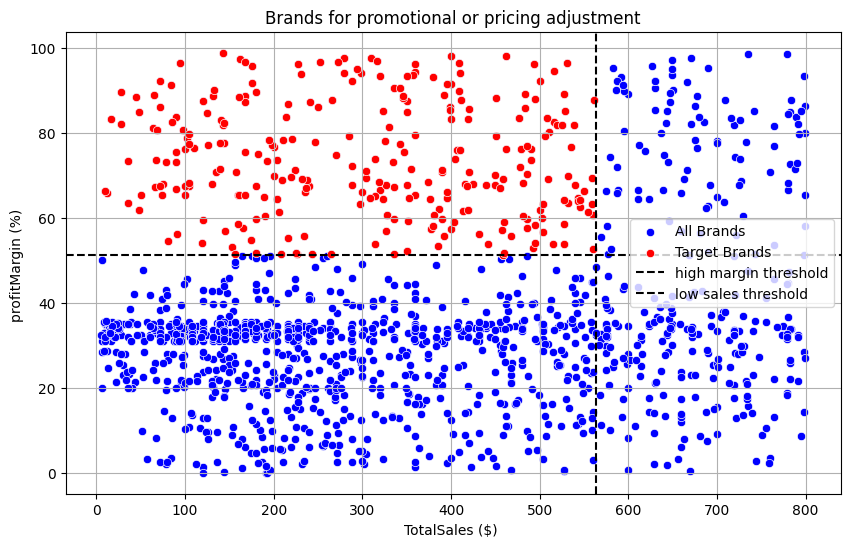

In [52]:
#using scatter plot to visualize the required target 
plt.figure( figsize=(10,6) )
sns.scatterplot(data=brand_performance,x="TotalSalesDollars",y="profitMargin",color="blue",label="All Brands ")
sns.scatterplot(data=target_brands,x="TotalSalesDollars",y="profitMargin",color="red",label="Target Brands")
plt.axhline(high_profit_threshold,linestyle='--',color="black",label="high margin threshold")
plt.axvline(low_sales_threshold,linestyle='--',color="black",label='low sales threshold')
plt.xlabel("TotalSales ($) ")
plt.ylabel("profitMargin (%) ")
plt.title("Brands for promotional or pricing adjustment")
plt.legend()
plt.grid(True)
plt.show()

Q2. which vendors and brands demonstrate the highest sales performance ? 

In [17]:

top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(5)
top_brands = df.groupby('Brand')['TotalSalesDollars'].sum().nlargest(5)

In [18]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC    67990099.42
MARTIGNETTI COMPANIES       39330359.36
PERNOD RICARD USA           32063196.19
JIM BEAM BRANDS COMPANY     31423020.46
BACARDI USA INC             24854817.14
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brands

Brand
1233    5101919.51
3405    4819073.49
8068    4538120.60
4261    4475972.88
3545    4223107.62
Name: TotalSalesDollars, dtype: float64

In [20]:
def format_number(x):
    if x < 1000:
        return f"{x:.2f}" 
    elif x < 1000000:
        return f"{x/1000:.2f}k" 
    else:
        return f"{x/1000000:.2f}m"

Q3. Which vendors contribute the most to total purchase dollars ? 

In [21]:
 vendor_performance = df.groupby('VendorName').agg({
     'TotalPurchaseDollars' : 'sum' ,
     'grossProfit' : 'sum',
     'TotalSalesDollars' : 'sum' 
 }).reset_index()

In [22]:
vendor_performance

,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [23]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [24]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending = False ) , 2 )*100

In [25]:
top_vendor = vendor_performance.head(10) 
top_vendor['TotalPurchaseDollars'] = vendor_performance['TotalPurchaseDollars'].apply(format_number)
top_vendor['grossProfit'] = top_vendor['grossProfit'].apply(format_number)
top_vendor['TotalSalesDollars'] = top_vendor['TotalSalesDollars'].apply(format_number)
top_vendor

,VendorName,TotalPurchaseDollars,grossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INCDIAGEO NORTH AMERICA I...,5009.72m,1789.29m,6799.01m,16.0
57,MARTIGNETTI COMPANIESMARTIGNETTI COMPANIESMART...,2550.21m,1382.83m,3933.04m,8.0
68,PERNOD RICARD USAPERNOD RICARD USAPERNOD RICAR...,2385.12m,821.20m,3206.32m,8.0
46,JIM BEAM BRANDS COMPANYJIM BEAM BRANDS COMPANY...,2349.43m,792.87m,3142.30m,8.0
6,BACARDI USA INCBACARDI USA INCBACARDI USA INCB...,1743.20m,742.28m,2485.48m,6.0
20,CONSTELLATION BRANDS INCCONSTELLATION BRANDS I...,1527.37m,894.50m,2421.87m,5.0
11,BROWN-FORMAN CORPBROWN-FORMAN CORPBROWN-FORMAN...,1323.89m,500.83m,1824.72m,4.0
30,E & J GALLO WINERYE & J GALLO WINERYE & J GALL...,1206.85m,633.14m,1839.99m,4.0
106,ULTRA BEVERAGE COMPANY LLPULTRA BEVERAGE COMPA...,1116.71m,533.55m,1650.25m,4.0
53,M S WALKER INCM S WALKER INCM S WALKER INCM S ...,976.43m,494.21m,1470.65m,3.0


In [26]:
top_vendor['PurchaseContribution%'].sum()

np.float64(66.0)

Q4. How much of total procurement is dependent on top vendor ? 

In [27]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendor['PurchaseContribution%'].sum(),2)}%")

Total purchase contribution of top 10 vendors is 66.0%


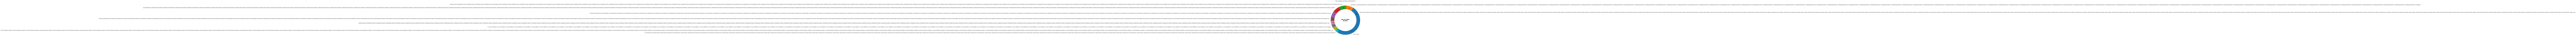

In [28]:
vendors = list(top_vendor['VendorName'].values)
purchase_contribution = list(top_vendor['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100-total_contribution
#append "Others vendor " category
vendors.append("Other vendors")
purchase_contribution.append(remaining_contribution)
#donut chart 
fig,ax=plt.subplots(figsize=(8,8)) 
wedges=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',pctdistance=0.85)
create_circle=plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(create_circle)
# adding total contribution annotation in the center 
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')
plt.title("Top 10 Vendor purchase Contribution(%)")
plt.show()

Q5. Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost saving ?  

In [29]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalEXciseTax,FreightCost,grossProfit,profitMargin,stockTurnOver,salesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [30]:
df['orderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['small','medium','large'])

In [31]:
df.groupby('orderSize')['UnitPurchasePrice'].mean()

orderSize
small     39.068186
medium    15.486414
large     10.777625
Name: UnitPurchasePrice, dtype: float64

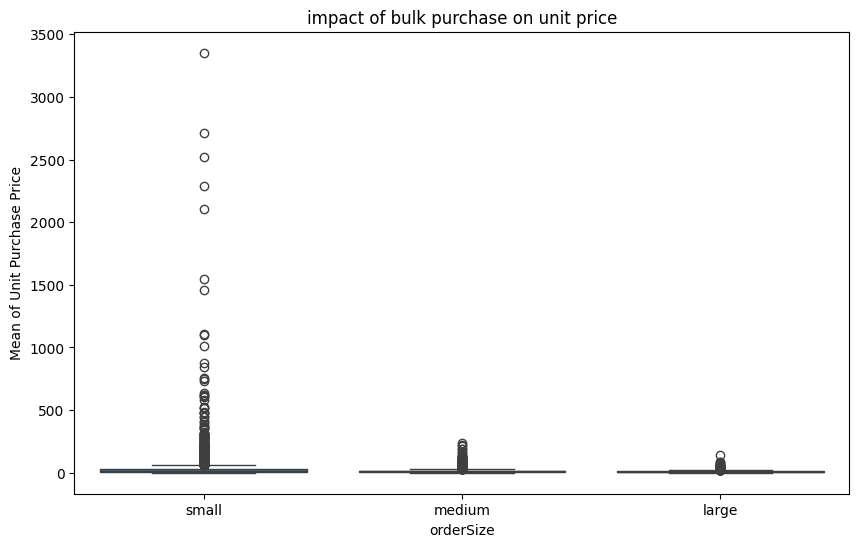

In [32]:
#box plot for outlier 
plt.figure(figsize=(10,6))
sns.boxplot(data=df , x = "orderSize",y="UnitPurchasePrice")
plt.title("impact of bulk purchase on unit price")
plt.xlabel("orderSize")
plt.ylabel("Mean of Unit Purchase Price")
plt.show()

1. Vendors buying in bulk get the lowest unit price , meaning higher margin if they can handle inventory efficientyly.
2. This suggest that bulk pricing strategies successfully encourage vendoros to purchase in large volumes .
3. The price difference between small and large is substantial.

Q6. which vendors have low inventory turnover,indicating excess stock and slow moving products? 

In [33]:
lowPerfVendors=df[df['stockTurnOver']<1]
lowPerfVendors.groupby('VendorName')['stockTurnOver'].mean().sort_values(ascending=True).head(10)

VendorName
ALISA CARR BEVERAGES           0.615385
HIGHLAND WINE MERCHANTS LLC    0.708333
PARK STREET IMPORTS LLC        0.751306
Circa Wines                    0.755676
Dunn Wine Brokers              0.766022
CENTEUR IMPORTS LLC            0.773953
SMOKY QUARTZ DISTILLERY LLC    0.783835
TAMWORTH DISTILLING            0.797078
THE IMPORTED GRAPE LLC         0.807569
WALPOLE MTN VIEW WINERY        0.820548
Name: stockTurnOver, dtype: float64

Q6. How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it ?


In [34]:
df['unsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital:',format_number(df['unsoldInventoryValue'].sum() ) )

Total Unsold Capital: 2.71m


In [35]:
#Aggregate Capital locked by vendor 
inventory_value_per_vendor = df.groupby('VendorName')['unsoldInventoryValue'].sum().reset_index()
#sorting with highest of this 
inventory_value_per_vendor = inventory_value_per_vendor.sort_values('unsoldInventoryValue',ascending=False)
inventory_value_per_vendor['unsoldInventoryValue']  = inventory_value_per_vendor['unsoldInventoryValue'].apply(format_number)
inventory_value_per_vendor.head(10)

,VendorName,unsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k
